In [1]:
%load_ext lab_black

In [2]:
import math
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dask.dataframe as dd

In [3]:
# pass掉前K个候选，计算出最大值，从K+1开始，遇到的大于最大值的立即结束
# 从K+1开始的时候，不更新最大值
def calcIncome(k, itemlist):
    currentMax = -1
    income = 0
    index = -1
    for idx in range(len(itemlist)):
        # 寻找 K个元素以内的最大值
        if idx < k:
            if itemlist[idx] > currentMax:
                currentMax = itemlist[idx]
            pass
        else:
            if itemlist[idx] > currentMax:
                income = itemlist[idx]
                index = idx
                break
            pass
        pass
    return income, index

In [56]:
def calcDistribution(k, times, min_val=10, max_val=100, count=100):
    reslist = []
    normlist = []
    for i in range(times):
        lst = np.random.default_rng().uniform(min_val, max_val, count)
        avg = np.average(lst)
        income, idx = calcIncome(k, lst)
        reslist.append(income)
        normlist.append(income / avg)
        pass
    # s1 = pd.Series(reslist)
    s2 = pd.Series(normlist)
    # s1.plot.kde()
    # print(s2.describe())
    # s2.plot.kde()
    return s2.mean(), s2.std()
    pass

In [57]:
calcDistribution(2, 10000, count=50)

(1.4805121948501798, 0.4015888439672472)

In [66]:
def calcTotalDistribution(count):
    df = pd.DataFrame(list(range(1, count + 1)), columns=["PassCount"])
    ddf = dd.from_pandas(df, npartitions=6)
    ddf["Result"] = ddf.apply(
        lambda tmprow: calcDistribution(tmprow["PassCount"], 10000, count=count),
        meta=("Y", "object"),
        axis=1,
    )
    return ddf.compute()

In [78]:
resdf = calcTotalDistribution(1000)

In [79]:
resdf

,PassCount,Result
0,1,"(1.4094566542321652, 0.36628513584652)"
1,2,"(1.5457255883438006, 0.27987715354899156)"
2,3,"(1.6101020772338073, 0.23607010217555588)"
3,4,"(1.6454104312288993, 0.22044308477350555)"
4,5,"(1.6738255513725568, 0.20020776653504463)"
...,...,...
995,996,"(0.007499193930816804, 0.11689260838512247)"
996,997,"(0.00508489076738562, 0.09597368004311758)"
997,998,"(0.002548752433814139, 0.06807809447004065)"
998,999,"(0.0028922275134195922, 0.07225773647603553)"


In [80]:
resdf[["income", "std"]] = pd.DataFrame(resdf["Result"].tolist(), index=resdf.index)

In [81]:
resdf

,PassCount,Result,income,std
0,1,"(1.4094566542321652, 0.36628513584652)",1.409457,0.366285
1,2,"(1.5457255883438006, 0.27987715354899156)",1.545726,0.279877
2,3,"(1.6101020772338073, 0.23607010217555588)",1.610102,0.236070
3,4,"(1.6454104312288993, 0.22044308477350555)",1.645410,0.220443
4,5,"(1.6738255513725568, 0.20020776653504463)",1.673826,0.200208
...,...,...,...,...
995,996,"(0.007499193930816804, 0.11689260838512247)",0.007499,0.116893
996,997,"(0.00508489076738562, 0.09597368004311758)",0.005085,0.095974
997,998,"(0.002548752433814139, 0.06807809447004065)",0.002549,0.068078
998,999,"(0.0028922275134195922, 0.07225773647603553)",0.002892,0.072258


<AxesSubplot:xlabel='PassCount'>

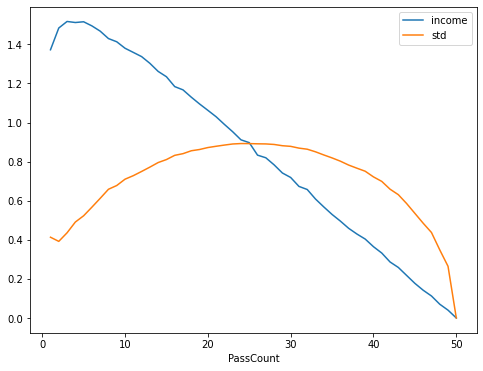

In [77]:
resdf.plot(x="PassCount", y=["income", "std"], figsize=(8, 6))

<AxesSubplot:xlabel='PassCount'>

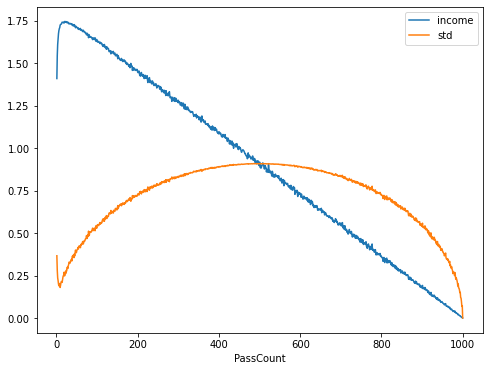

In [82]:
resdf.plot(x="PassCount", y=["income", "std"], figsize=(8, 6))